<a href="https://colab.research.google.com/github/Kazureee/Python-Lessons/blob/main/K_Means_Clustering_Activity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# Mount Google Drive to access data files
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd  # Used for reading and manipulating data in CSV files
import matplotlib.pyplot as plt  # Used for creating visualizations (e.g., plots, charts)
from sklearn.cluster import KMeans  # Provides the KMeans clustering algorithm
from sklearn.preprocessing import StandardScaler  # Used for feature scaling (standardization)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
#read my csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Credit_Data.csv')
df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [110]:
#drop the not needed columns
columns_to_drop = [col for col in df.columns if col not in ['Income', 'Balance']]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df

,Income,Balance
0,14.891,333
1,106.025,903
2,104.593,580
3,148.924,964
4,55.882,331
...,...,...
395,12.096,560
396,13.364,480
397,57.872,138
398,37.728,0


In [111]:
#cleaning if there are missing data
df = selected_columns.dropna()
df

,Income,Balance
0,14.891,333
1,106.025,903
2,104.593,580
3,148.924,964
4,55.882,331
...,...,...
395,12.096,560
396,13.364,480
397,57.872,138
398,37.728,0


In [114]:
#standardization
#transforms the data to have zero mean and unit variance, which can improve KMeans performance.

scalar = StandardScaler()
scalar.fit(df[['Income']])
df[['Income_T']] = scalar.transform(df[['Income']])

scalar.fit(df[['Balance']])
df[['Balance_T']] = scalar.transform(df[['Balance']])

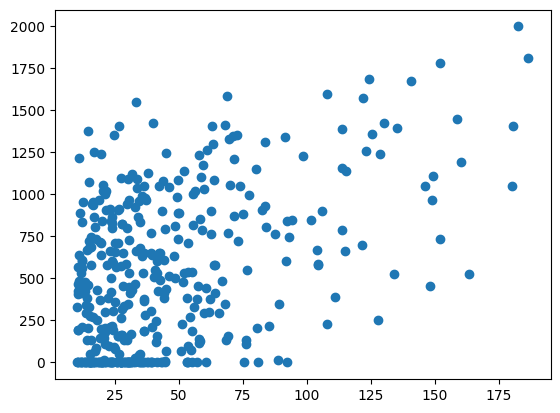

In [115]:
#graph the data
plt.scatter(df['Income'] , df['Balance'])

In [116]:
#cluster the data into 3
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Income_T', 'Balance_T']])
y_predicted

array([2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0,

In [118]:
# Assign cluster labels to the DataFrame
df['cluster'] = y_predicted
df

,Income,Balance,Income_T,Balance_T,cluster
0,14.891,333,-0.861583,-0.407277,2
1,106.025,903,1.727437,0.834056,1
2,104.593,580,1.686756,0.130634,1
3,148.924,964,2.946152,0.966900,1
4,55.882,331,0.302928,-0.411633,2
...,...,...,...,...,...
395,12.096,560,-0.940986,0.087078,0
396,13.364,480,-0.904963,-0.087144,2
397,57.872,138,0.359462,-0.831944,2
398,37.728,0,-0.212808,-1.132477,2


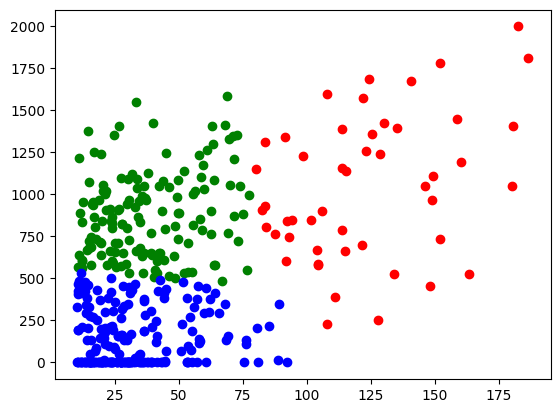

In [128]:
#graph the clusters of original income and balance with colors assigned
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Income'], df1['Balance'], color='green')
plt.scatter(df2['Income'], df2['Balance'], color='red')
plt.scatter(df3['Income'], df3['Balance'], color='blue')

In [121]:
#assigning label based on Income and Balance characteristics
def IncomeXBalance(cluster):
    cluster_mapping = {
        0: 'Low Income & Low Balance',
        1: 'Medium Income & Medium Balance',
        2: 'High Income & High Balance'
    }
    return cluster_mapping.get(cluster, 'Unknown')

df['IncomeXBalance'] = df['cluster'].apply(IncomeXBalance)

df

,Income,Balance,Income_T,Balance_T,cluster,IncomeXBalance
0,14.891,333,-0.861583,-0.407277,2,High Income & High Balance
1,106.025,903,1.727437,0.834056,1,Medium Income & Medium Balance
2,104.593,580,1.686756,0.130634,1,Medium Income & Medium Balance
3,148.924,964,2.946152,0.966900,1,Medium Income & Medium Balance
4,55.882,331,0.302928,-0.411633,2,High Income & High Balance
...,...,...,...,...,...,...
395,12.096,560,-0.940986,0.087078,0,Low Income & Low Balance
396,13.364,480,-0.904963,-0.087144,2,High Income & High Balance
397,57.872,138,0.359462,-0.831944,2,High Income & High Balance
398,37.728,0,-0.212808,-1.132477,2,High Income & High Balance


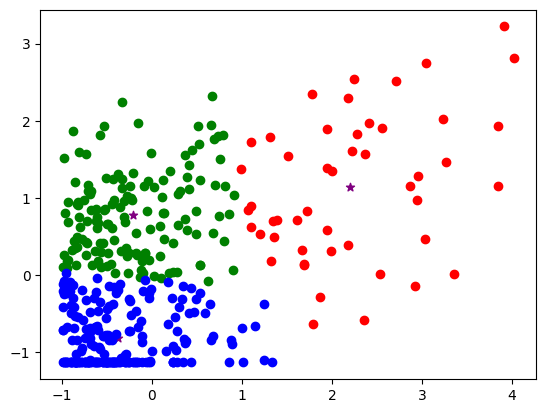

In [127]:
#graph the clusters of transformed/standardize values of income and balance with colors assigned
km.cluster_centers_

df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker="*")

plt.scatter(df1['Income_T'], df1['Balance_T'], color='green')
plt.scatter(df2['Income_T'], df2['Balance_T'], color='red')
plt.scatter(df3['Income_T'], df3['Balance_T'], color='blue')

In [129]:
 # Use value_counts() to get the frequency of each unique value
count = df['cluster'].value_counts()
count

,count
cluster,
2,206
0,145
1,49
